# Heart Disease Risk Prediction

## Objective
### The goal of this project is to build a machine learning model that predicts the likelihood of heart disease based on patient health metrics.

### Importing required libraries for the Machine Learning Workflow

In [2]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [3]:
df = pd.read_csv('heart_data.csv')
df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


### Checking numbers of rows and columns in data set

In [5]:
df.shape

(1190, 12)

In [6]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### Checking for Missing or Zero Values

In [7]:
(df == 0.0).sum()

age                      0
sex                    281
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar    936
resting ecg            684
max heart rate           0
exercise angina        729
oldpeak                455
ST slope                 1
target                 561
dtype: int64

### Exploring Data Types and Target Distribution

In [8]:
print(df.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


In [9]:
print(df['target'].value_counts())

target
1    629
0    561
Name: count, dtype: int64


### Visualizes how categorical features relate to heart disease. For example, the sex countplot shows the number of males and females with or without heart disease, helping identify patterns and important features for prediction.

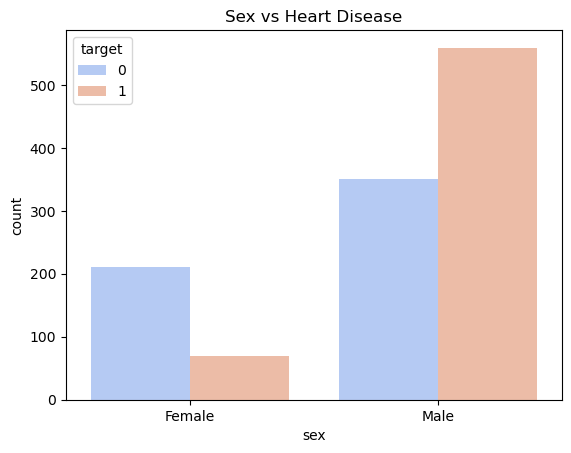

In [10]:
sns.countplot(x='sex', hue='target', data=df, palette='coolwarm')
plt.title("Sex vs Heart Disease")
plt.xticks([0,1], ['Female','Male'])
plt.show()

### Correlation Heatmap
#### Shows how features are correlated with each other and with the target.

#### Helps in understanding which features may be more important for prediction.

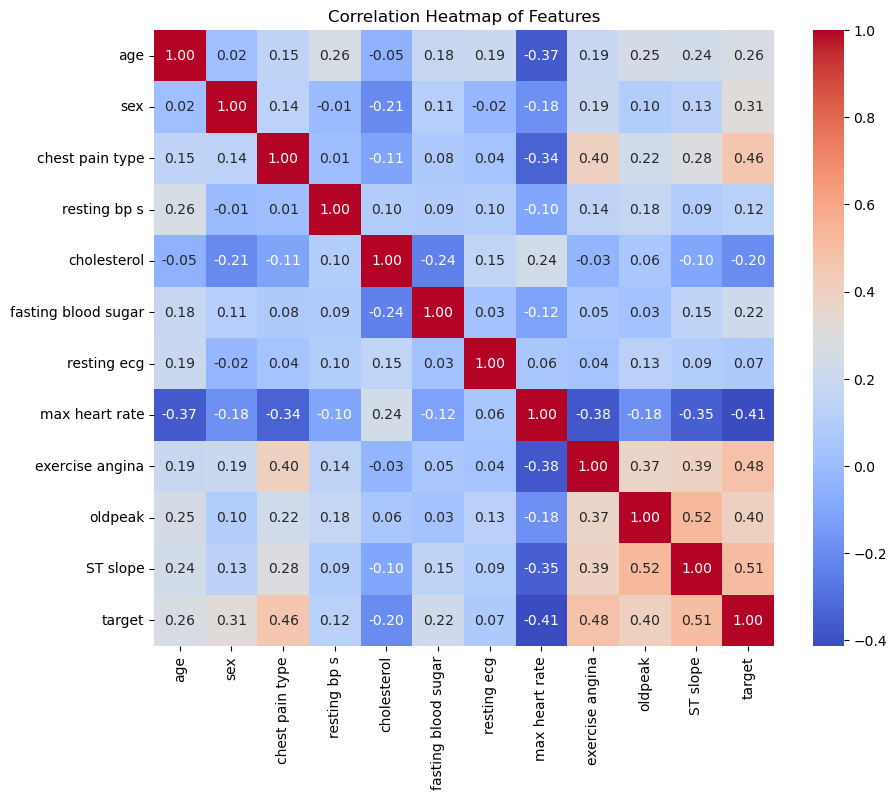

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

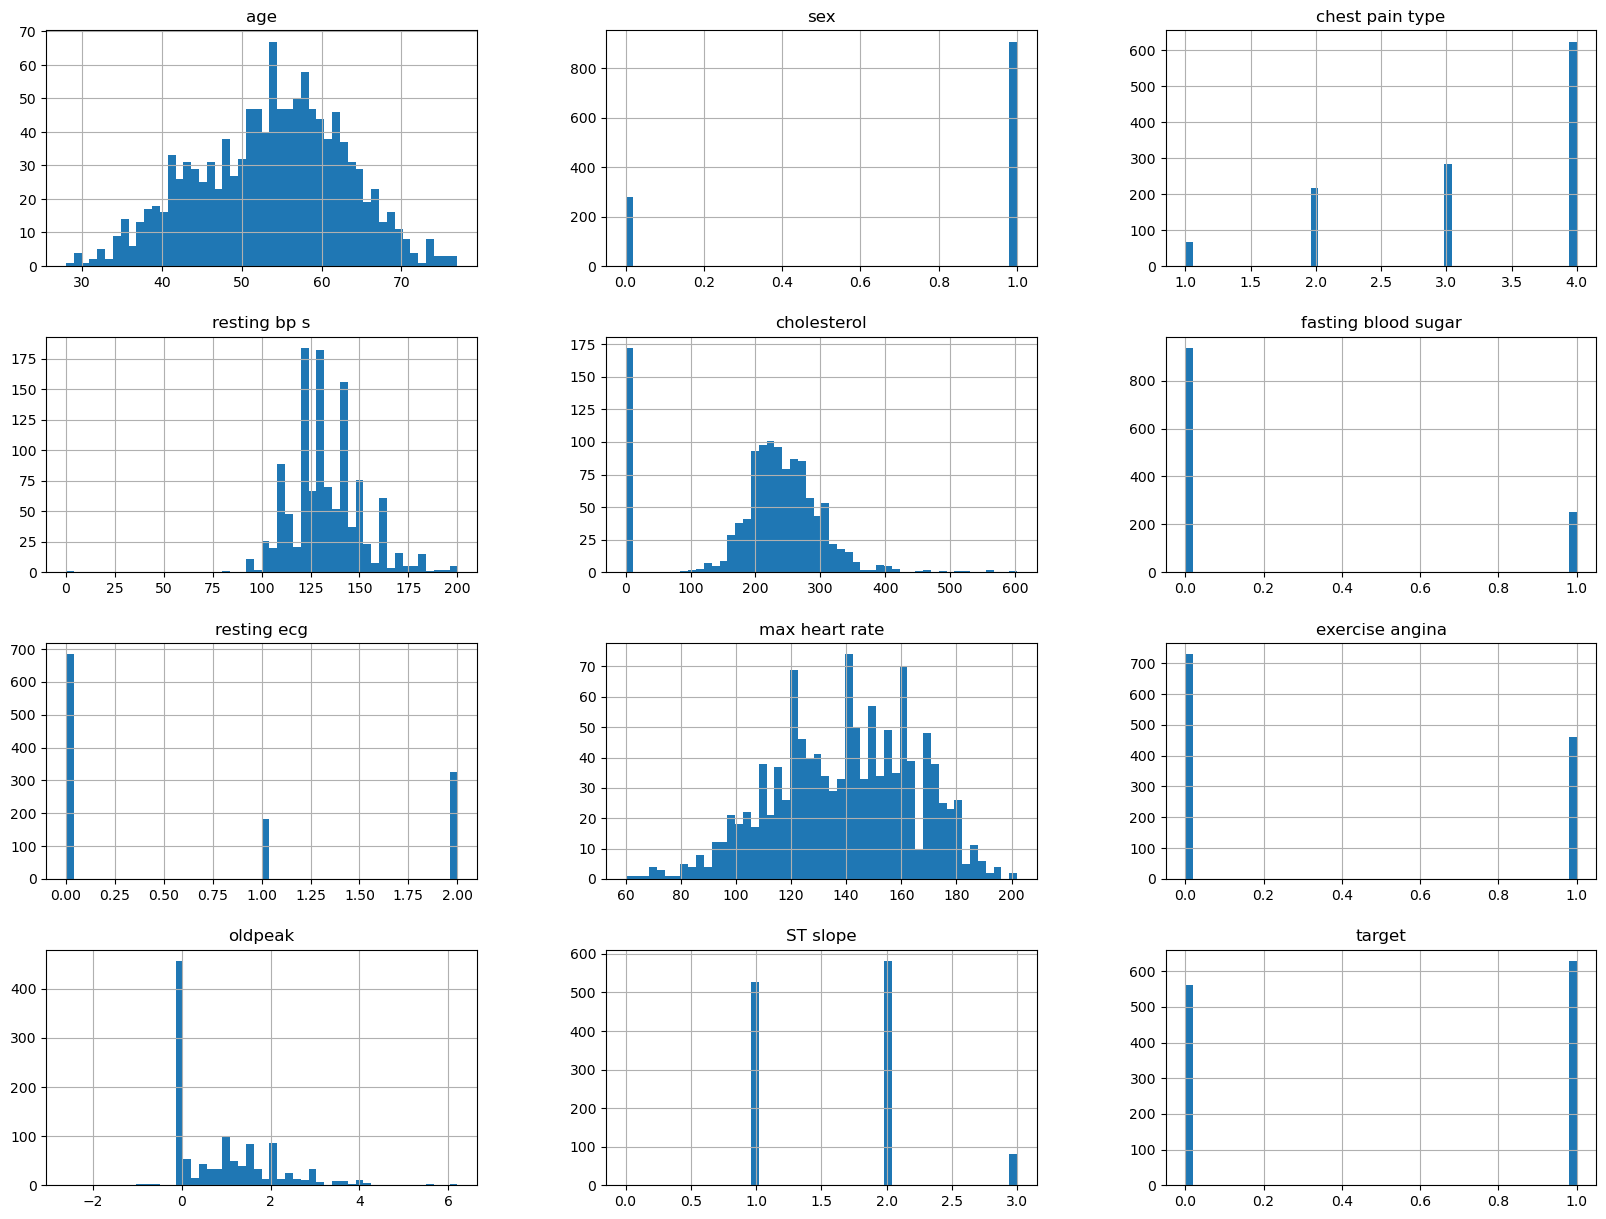

In [12]:
df.hist(bins = 50, figsize = (20,15))

In [13]:
(df == 0.0).sum()

age                      0
sex                    281
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar    936
resting ecg            684
max heart rate           0
exercise angina        729
oldpeak                455
ST slope                 1
target                 561
dtype: int64

### Handling Missing/Zero Values
#### Replaces 0 values in cholesterol with the median of non-zero cholesterol values.

#### This avoids biasing the model with invalid zeros.

In [14]:
median_cholesterol = df[df['cholesterol'] > 0] ['cholesterol'].median()
print(median_cholesterol)


240.0


In [15]:
df['cholesterol'] = df['cholesterol'].replace(0, median_cholesterol)

finding data where their values is 0.0

In [16]:
(df == 0.0).sum()

age                      0
sex                    281
chest pain type          0
resting bp s             1
cholesterol              0
fasting blood sugar    936
resting ecg            684
max heart rate           0
exercise angina        729
oldpeak                455
ST slope                 1
target                 561
dtype: int64

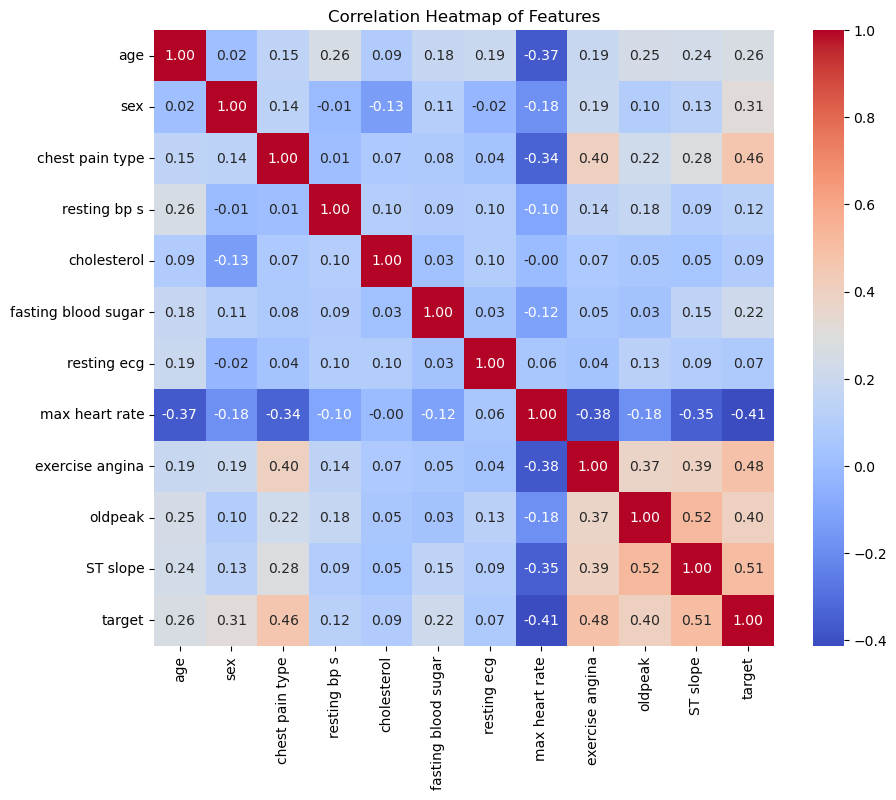

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Dropping Less Useful Features ie, negative correlated columns 
#### Keeps the dataset clean and reduces noise.

In [18]:
df1 = df.drop(['resting bp s', 'cholesterol',
               'fasting blood sugar', 'resting ecg', 'max heart rate'], axis=1)


In [19]:
df1

,age,sex,chest pain type,exercise angina,oldpeak,ST slope,target
0,40,1,2,0,0.0,1,0
1,49,0,3,0,1.0,2,1
2,37,1,2,0,0.0,1,0
3,48,0,4,1,1.5,2,1
4,54,1,3,0,0.0,1,0
...,...,...,...,...,...,...,...
1185,45,1,1,0,1.2,2,1
1186,68,1,4,0,3.4,2,1
1187,57,1,4,1,1.2,2,1
1188,57,0,2,0,0.0,2,1


In [20]:
df2 = df1[(df1['age'] >= 35) & (df1['age'] <= 70)]


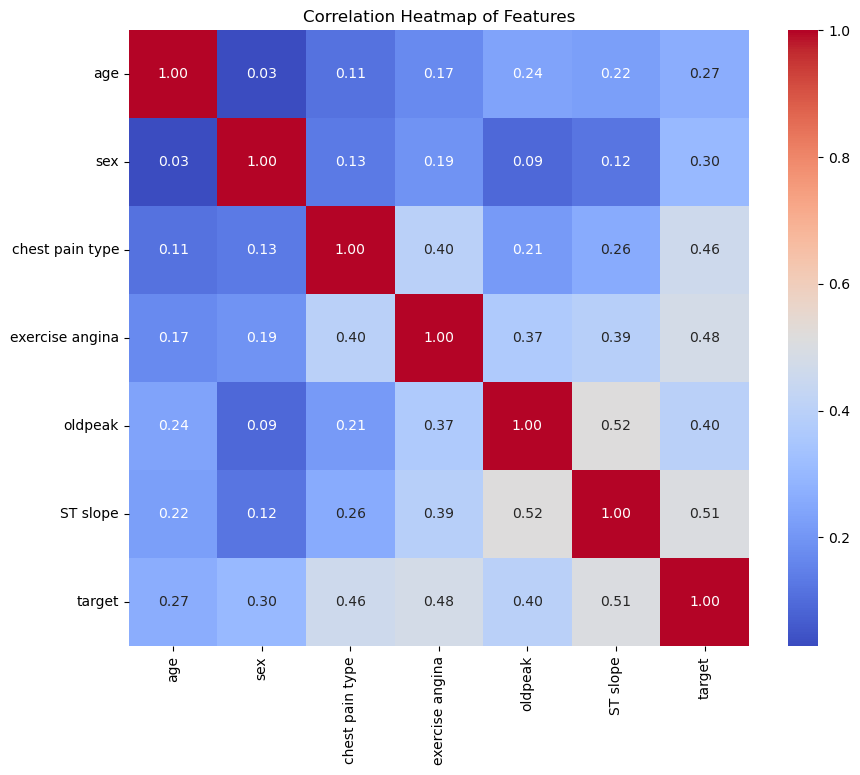

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Checking Data Distribution
#### Prints the distribution of values for each column.
#### Helps understand categorical feature balance.

In [22]:
for col in df2.columns:
    print(f"\nColumn: {col}")
    print(df2[col].value_counts())


Column: age
age
54    67
58    58
57    50
52    47
55    47
59    47
56    47
51    47
62    46
60    44
53    40
61    38
48    38
63    37
41    33
50    32
43    31
64    31
46    31
65    29
44    29
49    27
42    26
45    25
47    23
67    23
66    19
39    18
38    17
69    16
40    16
35    14
68    13
37    13
70    11
36     6
Name: count, dtype: int64

Column: sex
sex
1    873
0    263
Name: count, dtype: int64

Column: chest pain type
chest pain type
4    608
3    271
2    197
1     60
Name: count, dtype: int64

Column: exercise angina
exercise angina
0    691
1    445
Name: count, dtype: int64

Column: oldpeak
oldpeak
 0.0    429
 1.0     96
 2.0     82
 1.5     55
 1.2     40
 3.0     31
 1.4     30
 0.2     29
 0.8     27
 0.6     26
 1.8     25
 1.6     24
 0.5     24
 0.1     20
 2.5     18
 0.4     17
 0.3     14
 2.6     13
 1.9     12
 2.8     11
 2.2      9
 4.0      9
 3.6      8
 2.4      7
 1.3      7
 0.9      7
 1.1      7
 1.7      6
 3.4      5
 0.7      5

In [23]:
print(df2.dtypes)

age                  int64
sex                  int64
chest pain type      int64
exercise angina      int64
oldpeak            float64
ST slope             int64
target               int64
dtype: object


### Train-Test Split
#### Splits the data into training set (80%) and testing set (20%)

In [24]:
from sklearn.model_selection import train_test_split

X = df2.drop('target', axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45, stratify=y  # stratify keeps balance
)

print("Train target distribution:\n", y_train.value_counts())
print("Test target distribution:\n", y_test.value_counts())

Train target distribution:
 target
1    484
0    424
Name: count, dtype: int64
Test target distribution:
 target
1    122
0    106
Name: count, dtype: int64


In [25]:
for col in ['chest pain type', 'exercise angina', 'ST slope','oldpeak']:
    print(f"\n{col} - Train:")
    print(X_train[col].value_counts(normalize=True))
    print(f"{col} - Test:")
    print(X_test[col].value_counts(normalize=True))


chest pain type - Train:
chest pain type
4    0.530837
3    0.245595
2    0.168502
1    0.055066
Name: proportion, dtype: float64
chest pain type - Test:
chest pain type
4    0.552632
3    0.210526
2    0.192982
1    0.043860
Name: proportion, dtype: float64

exercise angina - Train:
exercise angina
0    0.602423
1    0.397577
Name: proportion, dtype: float64
exercise angina - Test:
exercise angina
0    0.631579
1    0.368421
Name: proportion, dtype: float64

ST slope - Train:
ST slope
2    0.498899
1    0.435022
3    0.066079
Name: proportion, dtype: float64
ST slope - Test:
ST slope
2    0.486842
1    0.434211
3    0.074561
0    0.004386
Name: proportion, dtype: float64

oldpeak - Train:
oldpeak
 0.0    0.386564
 1.0    0.087004
 2.0    0.073789
 1.5    0.046256
 1.2    0.030837
 1.4    0.028634
 3.0    0.026432
 0.2    0.026432
 1.8    0.023128
 0.8    0.023128
 1.6    0.020925
 0.5    0.019824
 0.6    0.019824
 0.1    0.018722
 0.4    0.016520
 2.5    0.016520
 0.3    0.012115
 2.

### Handling Negative Values
#### Replaces negative values in oldpeak with 0.

#### Negative values are invalid in this context.

In [26]:
X['oldpeak'] = X['oldpeak'].apply(lambda x: 0 if x < 0 else x)
X_train['oldpeak'] = X_train['oldpeak'].apply(lambda x: 0 if x < 0 else x)
X_test['oldpeak']  = X_test['oldpeak'].apply(lambda x: 0 if x < 0 else x)

In [27]:
print(df2['oldpeak'])

0       0.0
1       1.0
2       0.0
3       1.5
4       0.0
       ... 
1185    1.2
1186    3.4
1187    1.2
1188    0.0
1189    0.0
Name: oldpeak, Length: 1136, dtype: float64


In [28]:
for col in ['oldpeak']:
    print(f"\n{col} - Train:")
    print(X_train[col].value_counts(normalize=True))
    print(f"{col} - Test:")
    print(X_test[col].value_counts(normalize=True))


oldpeak - Train:
oldpeak
0.0    0.396476
1.0    0.087004
2.0    0.073789
1.5    0.046256
1.2    0.030837
1.4    0.028634
3.0    0.026432
0.2    0.026432
0.8    0.023128
1.8    0.023128
1.6    0.020925
0.6    0.019824
0.5    0.019824
0.1    0.018722
0.4    0.016520
2.5    0.016520
2.6    0.012115
0.3    0.012115
1.9    0.009912
2.8    0.009912
2.2    0.008811
1.7    0.006608
1.3    0.006608
3.6    0.006608
1.1    0.006608
4.0    0.005507
0.7    0.005507
0.9    0.005507
2.4    0.004405
4.2    0.003304
6.2    0.002203
3.1    0.002203
2.3    0.002203
3.8    0.002203
3.5    0.002203
5.6    0.002203
3.2    0.002203
2.9    0.002203
4.4    0.001101
3.7    0.001101
2.1    0.001101
5.0    0.001101
Name: proportion, dtype: float64
oldpeak - Test:
oldpeak
0.0    0.359649
1.0    0.074561
2.0    0.065789
1.5    0.057018
1.2    0.052632
0.6    0.035088
3.0    0.030702
0.5    0.026316
0.8    0.026316
3.4    0.021930
0.2    0.021930
1.6    0.021930
1.4    0.017544
1.8    0.017544
4.0    0.017544
1.9  

In [29]:
df2_train = X_train.copy()
df2_train['target'] = y_train
df2_test = X_test.copy()
df2_test['target'] = y_test

### Comparing Feature Distribution in Train vs Test
#### Plots bar charts for selected categorical features (sex, chest pain type, exercise angina, ST slope) to verify that train and test distributions are similar.

<Figure size 800x400 with 0 Axes>

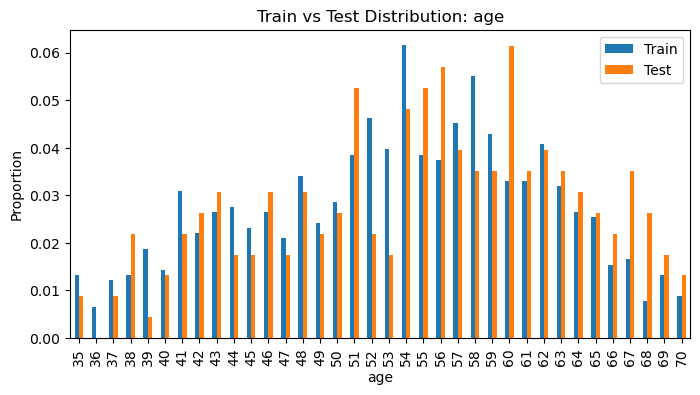

<Figure size 800x400 with 0 Axes>

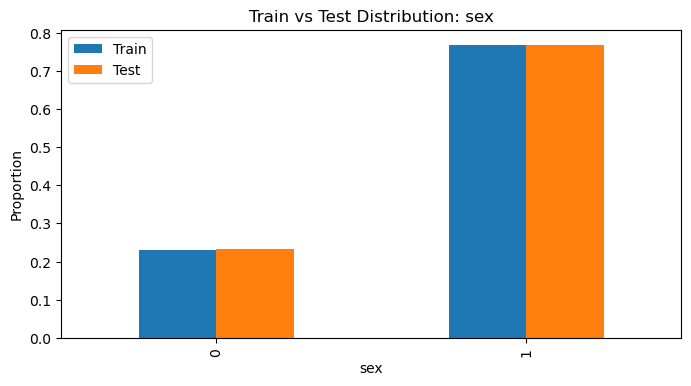

<Figure size 800x400 with 0 Axes>

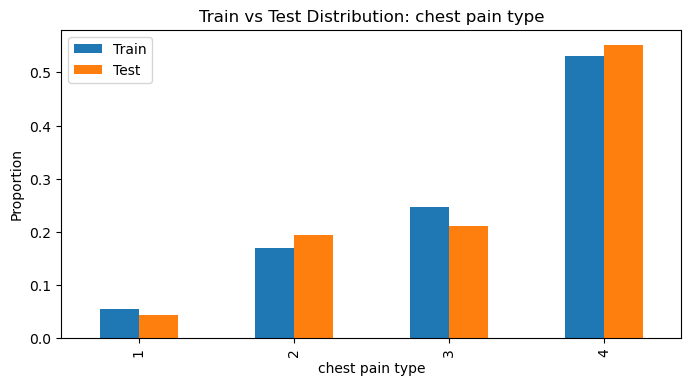

<Figure size 800x400 with 0 Axes>

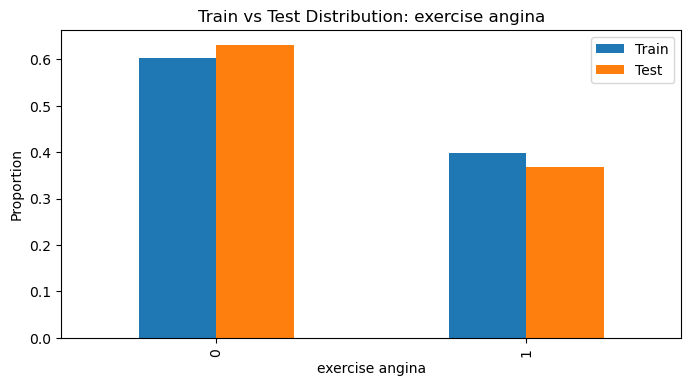

<Figure size 800x400 with 0 Axes>

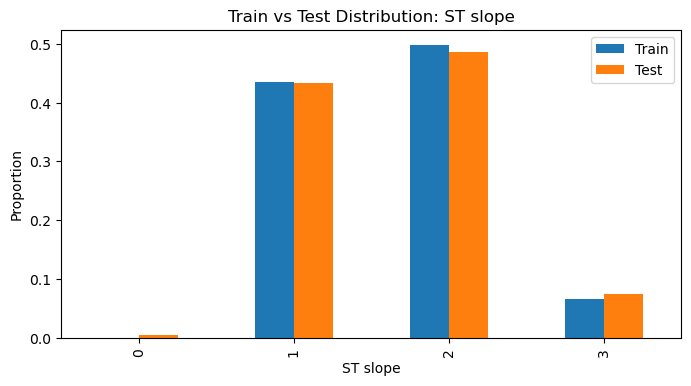

In [30]:
cols = ['age','sex', 'chest pain type', 'exercise angina', 'ST slope']

for col in cols:
    plt.figure(figsize=(8,4))
    train_counts = df2_train[col].value_counts(normalize=True).sort_index()
    test_counts  = df2_test[col].value_counts(normalize=True).sort_index()
    df_plot = pd.DataFrame({'Train': train_counts, 'Test': test_counts})
    df_plot.plot(kind='bar', figsize=(8,4))
    plt.title(f'Train vs Test Distribution: {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.show()

### Train Logistic Regression Model

Create a pipeline with feature scaling and logistic regression, then evaluate performance.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('model', LogisticRegression())    
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8421052631578947


### Decision Tree Model

Train and evaluate a decision tree classifier on selected features.

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Pipeline
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),         
    ('dt', DecisionTreeClassifier(random_state=45))
])

# Fit
pipe_dt.fit(X_train[cols], y_train)

# Predict
y_pred_dt = pipe_dt.predict(X_test[cols])

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8289473684210527


## Model 3: Random Forest Classifier

Ensemble approach using 1000 decision trees to improve prediction accuracy and robustness.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),  # optional for tree-based models
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=45))
])

# Train
pipe_rf.fit(X_train, y_train)

# Predict
y_pred_rf = pipe_rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9035087719298246

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       106
           1       0.90      0.92      0.91       122

    accuracy                           0.90       228
   macro avg       0.90      0.90      0.90       228
weighted avg       0.90      0.90      0.90       228



## Model 4: Linear Regression (Regression → Classification)

Converting a regression problem to classification by thresholding continuous predictions at 0.5.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression pipeline
pipe_lr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Train
pipe_lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = pipe_lr_model.predict(X_test)

# Evaluate

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

y_pred_lr_bin = (y_pred_lr >= 0.5).astype(int)
from sklearn.metrics import accuracy_score
print("Linear Regression Accuracy (binary):", accuracy_score(y_test, y_pred_lr_bin))


MSE: 0.1344726329910612
R2 Score: 0.4594474672589449
Linear Regression Accuracy (binary): 0.8333333333333334


### K-Nearest Neighbors Model

Distance-based classifier using the 5 nearest neighbors for prediction.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# KNN pipeline
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),  # scaling is important for KNN
    ('knn', KNeighborsClassifier(n_neighbors=5))  # you can tune n_neighbors
])

# Train
pipe_knn.fit(X_train, y_train)

# Predict
y_pred_knn = pipe_knn.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8464912280701754


### Gradient Boosting Model

Boosting ensemble with 1000 trees, learning rate 0.10, and detailed performance evaluation.

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=1000,    # number of trees
    learning_rate=0.10,   # step size shr
    max_depth=4,         # depth of each tree
    random_state=45
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9035087719298246

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       106
           1       0.90      0.93      0.91       122

    accuracy                           0.90       228
   macro avg       0.90      0.90      0.90       228
weighted avg       0.90      0.90      0.90       228



## Model Comparison & Evaluation

Systematically comparing all models using multiple metrics:
- Accuracy: Overall correctness
- Precision: Positive prediction accuracy
- Recall: True positive detection rate
- F1-Score: Harmonic mean of precision and recall

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary to store your models and predictions
models_preds = {
    'Logistic Regression': y_pred,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Linear Regression (binary)': y_pred_lr_bin,
    'K-Nearest Neighbors': y_pred_knn,
    'Gradient Boosting': y_pred_gb
}

# Initialize a list to store metrics
metrics_list = []

# Calculate metrics for each model
for model_name, preds in models_preds.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    
    
    metrics_list.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-score': round(f1, 3),
        
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(metrics_df)


                        Model  Accuracy  Precision  Recall  F1-score
0               Random Forest     0.904      0.903   0.918     0.911
1           Gradient Boosting     0.904      0.897   0.926     0.911
2         K-Nearest Neighbors     0.846      0.848   0.869     0.858
3         Logistic Regression     0.842      0.831   0.885     0.857
4  Linear Regression (binary)     0.833      0.828   0.869     0.848
5               Decision Tree     0.829      0.867   0.803     0.834


### Model Performance Visualizations

1. **Accuracy Bar Chart**: Side-by-side comparison of all models
2. **ROC Curves**: Performance analysis for models with probability predictions (AUC scores)

                        Model  Accuracy
2               Random Forest  0.903509
5           Gradient Boosting  0.903509
4         K-Nearest Neighbors  0.846491
0         Logistic Regression  0.842105
3  Linear Regression (binary)  0.833333
1               Decision Tree  0.828947


/var/folders/d6/jbdgpdts2dlc2370hmzb47k00000gn/T/ipykernel_16597/894066980.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_table, palette='viridis')


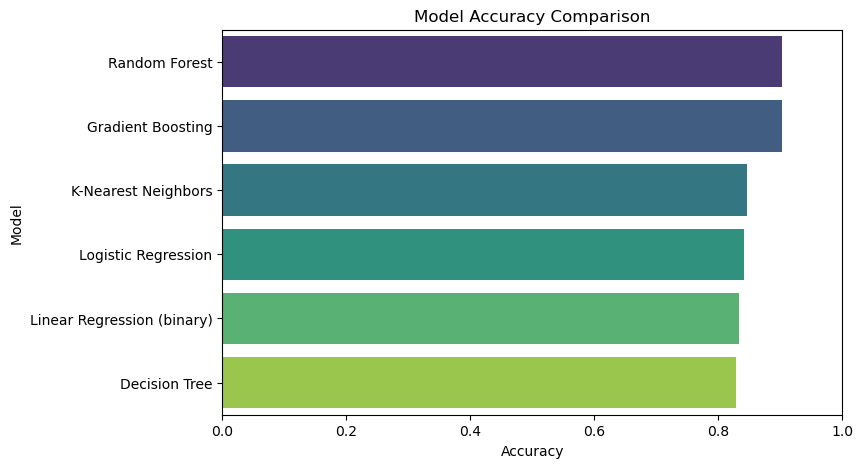

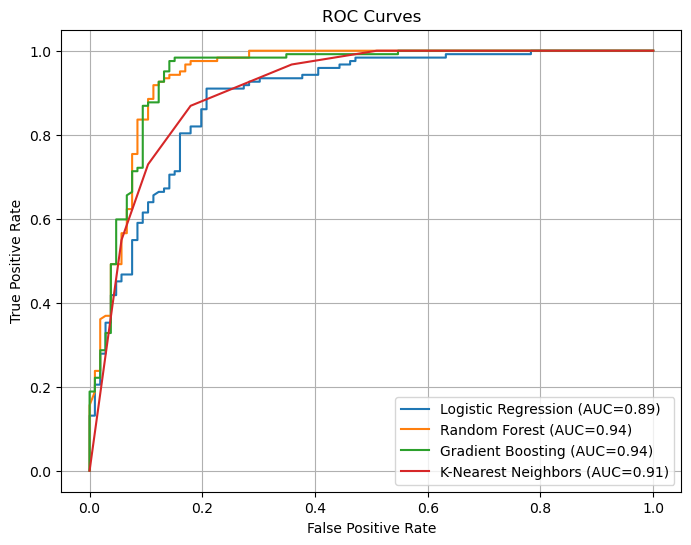

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

# --- 1. Accuracy Table and Bar Plot ---
accuracy_dict = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Linear Regression (binary)': accuracy_score(y_test, y_pred_lr_bin),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

accuracy_table = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(accuracy_table)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=accuracy_table, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0,1)
plt.show()

# --- 3. ROC Curves ---
models_proba = {
    'Logistic Regression': pipeline,
    'Random Forest': pipe_rf,
    'Gradient Boosting': gb_model,
    'K-Nearest Neighbors': pipe_knn
}

plt.figure(figsize=(8,6))
for name, model in models_proba.items():
    try:
        y_proba = model.predict_proba(X_test)[:,1]  
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')
    except:
        print(f'{name} skipped (no predict_proba)')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

## Confusion Matrix Analysis

Detailed breakdown of model predictions vs actual results:
- **True Positives (TP)**: Correctly predicted disease cases
- **True Negatives (TN)**: Correctly predicted no disease cases
- **False Positives (FP)**: Incorrectly predicted disease (Type I error)
- **False Negatives (FN)**: Missed disease cases (Type II error)

Visualizing confusion matrices for all 6 models to understand prediction patterns and error types.

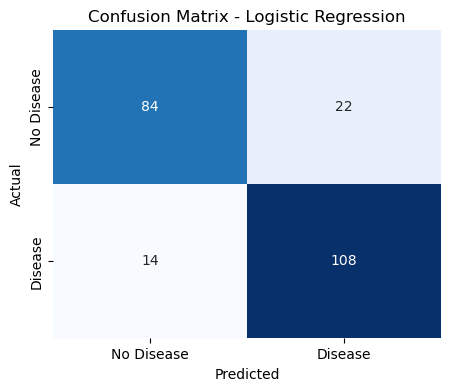

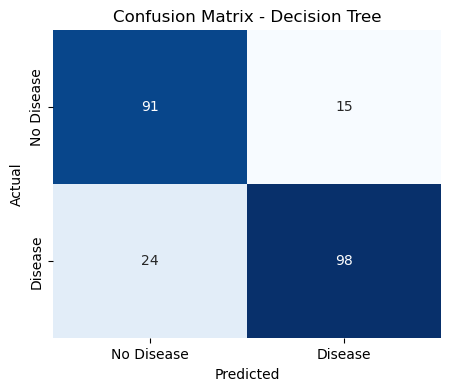

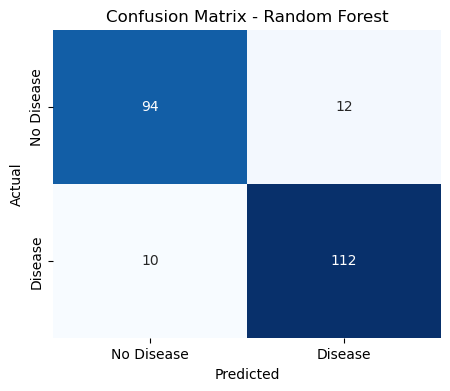

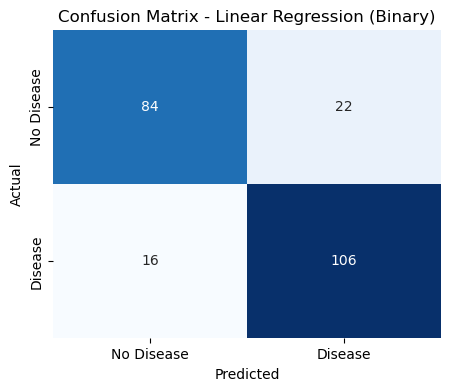

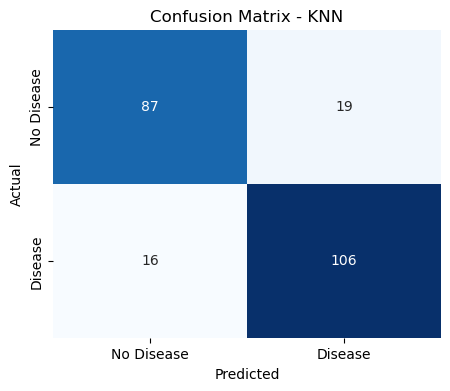

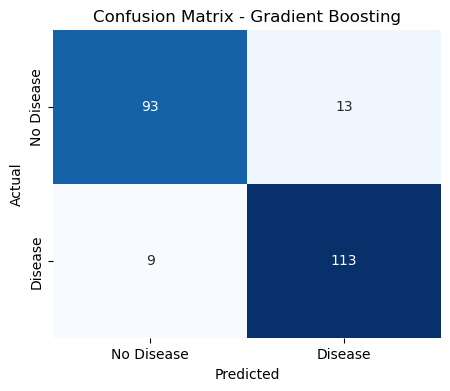

In [39]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage for your models:
plot_conf_matrix(y_test, y_pred, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_conf_matrix(y_test, y_pred_lr_bin, "Linear Regression (Binary)")
plot_conf_matrix(y_test, y_pred_knn, "KNN")
plot_conf_matrix(y_test, y_pred_gb, "Gradient Boosting")


### Scatter Plot: Age vs Chest Pain Type

Visualizing how age and chest pain type relate to heart disease diagnosis.

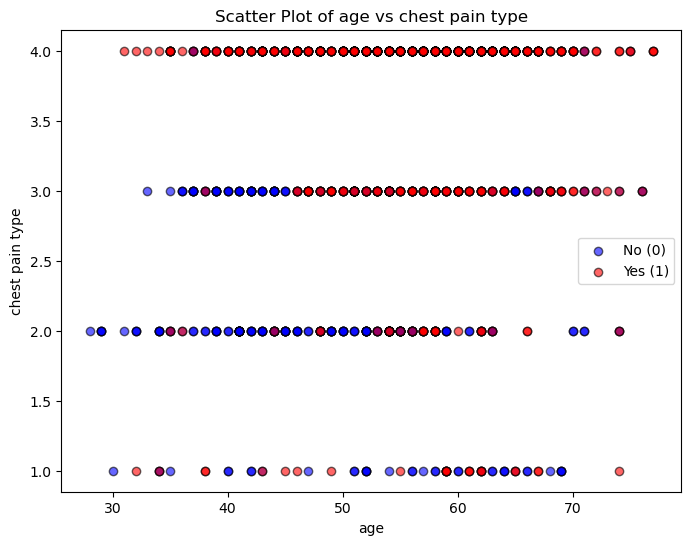

In [40]:
import matplotlib.pyplot as plt


x_feature = 'age'
y_feature = 'chest pain type'

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df[df['target']==0][x_feature], df[df['target']==0][y_feature],
            color='blue', label='No (0)', alpha=0.6, edgecolor='k')

plt.scatter(df[df['target']==1][x_feature], df[df['target']==1][y_feature],
            color='red', label='Yes (1)', alpha=0.6, edgecolor='k')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f"Scatter Plot of {x_feature} vs {y_feature}")
plt.legend()
plt.show()



In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 493 to 150
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              908 non-null    int64  
 1   sex              908 non-null    int64  
 2   chest pain type  908 non-null    int64  
 3   exercise angina  908 non-null    int64  
 4   oldpeak          908 non-null    float64
 5   ST slope         908 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 49.7 KB


### Model Export & Feature Importance

1. **Save Model**: Export trained Gradient Boosting classifier for future use
2. **Save Baseline**: Store healthy patient averages as reference
3. **Feature Ranking**: Display importance scores for each predictor

In [42]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import joblib
import json
# Save the newly trained model
joblib.dump(gb_model, "model.pkl")
print("Model saved!")

# Save healthy averages
features_needed = ['age', 'sex', 'chest pain type', 'exercise angina', 'oldpeak', 'ST slope']
healthy_avg = df[df['target'] == 0][features_needed].mean()

with open('healthy_avg.json', 'w') as f:
    json.dump([healthy_avg.to_dict()], f, indent=4)
print("Healthy averages saved!")

# Check if model has feature_importances_
loaded_model = joblib.load("model.pkl")
if hasattr(loaded_model, 'feature_importances_'):
    print("\nFeature importances available")
    feature_names = ['Age', 'Sex', 'Chest Pain Type', 'Exercise Angina', 'Oldpeak', 'ST Slope']
    for name, importance in zip(feature_names, loaded_model.feature_importances_):
        print(f"   {name}: {importance:.4f}")
else:
    print("\n Model doesn't have feature_importances_")

Model saved!
Healthy averages saved!

Feature importances available
   Age: 0.1593
   Sex: 0.0617
   Chest Pain Type: 0.1764
   Exercise Angina: 0.0522
   Oldpeak: 0.1562
   ST Slope: 0.3941
